# Assignment 7 

## 1)

This question builds on a question from assignment 6, whose answer was :

Let's first derive the expression for $x_{CE}$ when $\gamma = 1$ and $y := log(x) \sim \mathcal{N}(\mu, \sigma^2)$:

$$E[U(x)] = E[U(e^y)] = E[y] = \mu$$

Then, $$x_{CE} = e^\mu$$

Now let's consider the wealth process $W_t$ of our continuously rebalanced portfolio with risky asset allocation $\pi$:

$$dW_t = (r + \pi (\mu -r))\cdot W_t d_t + \pi \sigma W_t d z_t$$ 
Applying Ito's Lemma on log(Wt) gives $\log(W_t) \sim \mathcal{N}(r + \pi (\mu - r) - \frac{\pi^2 \sigma^2}{2}, \pi^2 \sigma ^2)$

Therefore, we need to maximize $x_{CE} = e^{r + \pi (\mu - r) - \frac{\pi^2 \sigma^2}{2}}$ which is equivalent to maximizing $r + \pi (\mu - r) - \frac{\pi^2 \sigma^2}{2}$ which is a concave polynomial of order 2 whose global minimum is at $$\pi^* = \frac{\mu - r}{\sigma}$$. 

Without any surprise, this is equal to the general CRRA formula with $\gamma = 1$. It corresponds to the units of excess returns per units of risk. The more excess-value-per-risk, the more we will put on the risky asset.


Let us now take a look at the merton calculation.


## 2) Slow backward induction
We propose to make the case where all distributions are gaussian faster by simply computing the parameters of the last gaussian distribution and returning it instead of sampling a full trace for everysample:

We couldn't test neither the original code nor our implementation since it just wouldn't run fast enough on our computer. 


##### Don't run this cell, it needs to be put inside  rl/chapter7/asset alloc discrete.py 

In [ ]:
def get_states_distribution(self, t: int) -> SampledDistribution[float]:
    if self.all_gaussian:
        actions_distr: Choose[float] = self.uniform_actions()

        wealth: float = self.initial_wealth_distribution
        μ, σ = wealth.μ, wealth.σ
        for i in range(t):
            distr: Distribution[float] = self.risky_return_distributions[i]
            rate: float = self.riskless_returns[i]
            alloc: float = actions_distr.sample()
            μ = alloc * (1 + distr.μ) + (μ - alloc)*(1+rate)
            #assuming independance : 
            σ = np.abs(alloc) * distr.σ + (σ) * np.abs(1 + rate)
        return Gaussian(μ, σ)

    else:
        actions_distr: Choose[float] = self.uniform_actions()

        def states_sampler_func() -> float:
            wealth: float = self.initial_wealth_distribution.sample()
            for i in range(t):
                distr: Distribution[float] = self.risky_return_distributions[i]
                rate: float = self.riskless_returns[i]
                alloc: float = actions_distr.sample()
                wealth = alloc * (1 + distr.sample()) + \
                    (wealth - alloc) * (1 + rate)
            return wealth

        return SampledDistribution(states_sampler_func)

This involves a new attribute all_gaussian which is true if and only if all the distributions of wealth and risky assrts are gaussian.

### Unspoken assumptions of asset alloc discrete.py

A very strong yet unspoken assumption that is made in the course model for discrete asset allocation is that all distributions are independant (which is reflected by get_states_distribution in the code). This assumption is very important and makes the prblem infinitely simpler, yet we couldn't find any justification for it. We thought we should point it out. In practice of course, Independance is not granted, otherwise there would be no single-asset trading strategies.

## 3) A story of skill, death and duty

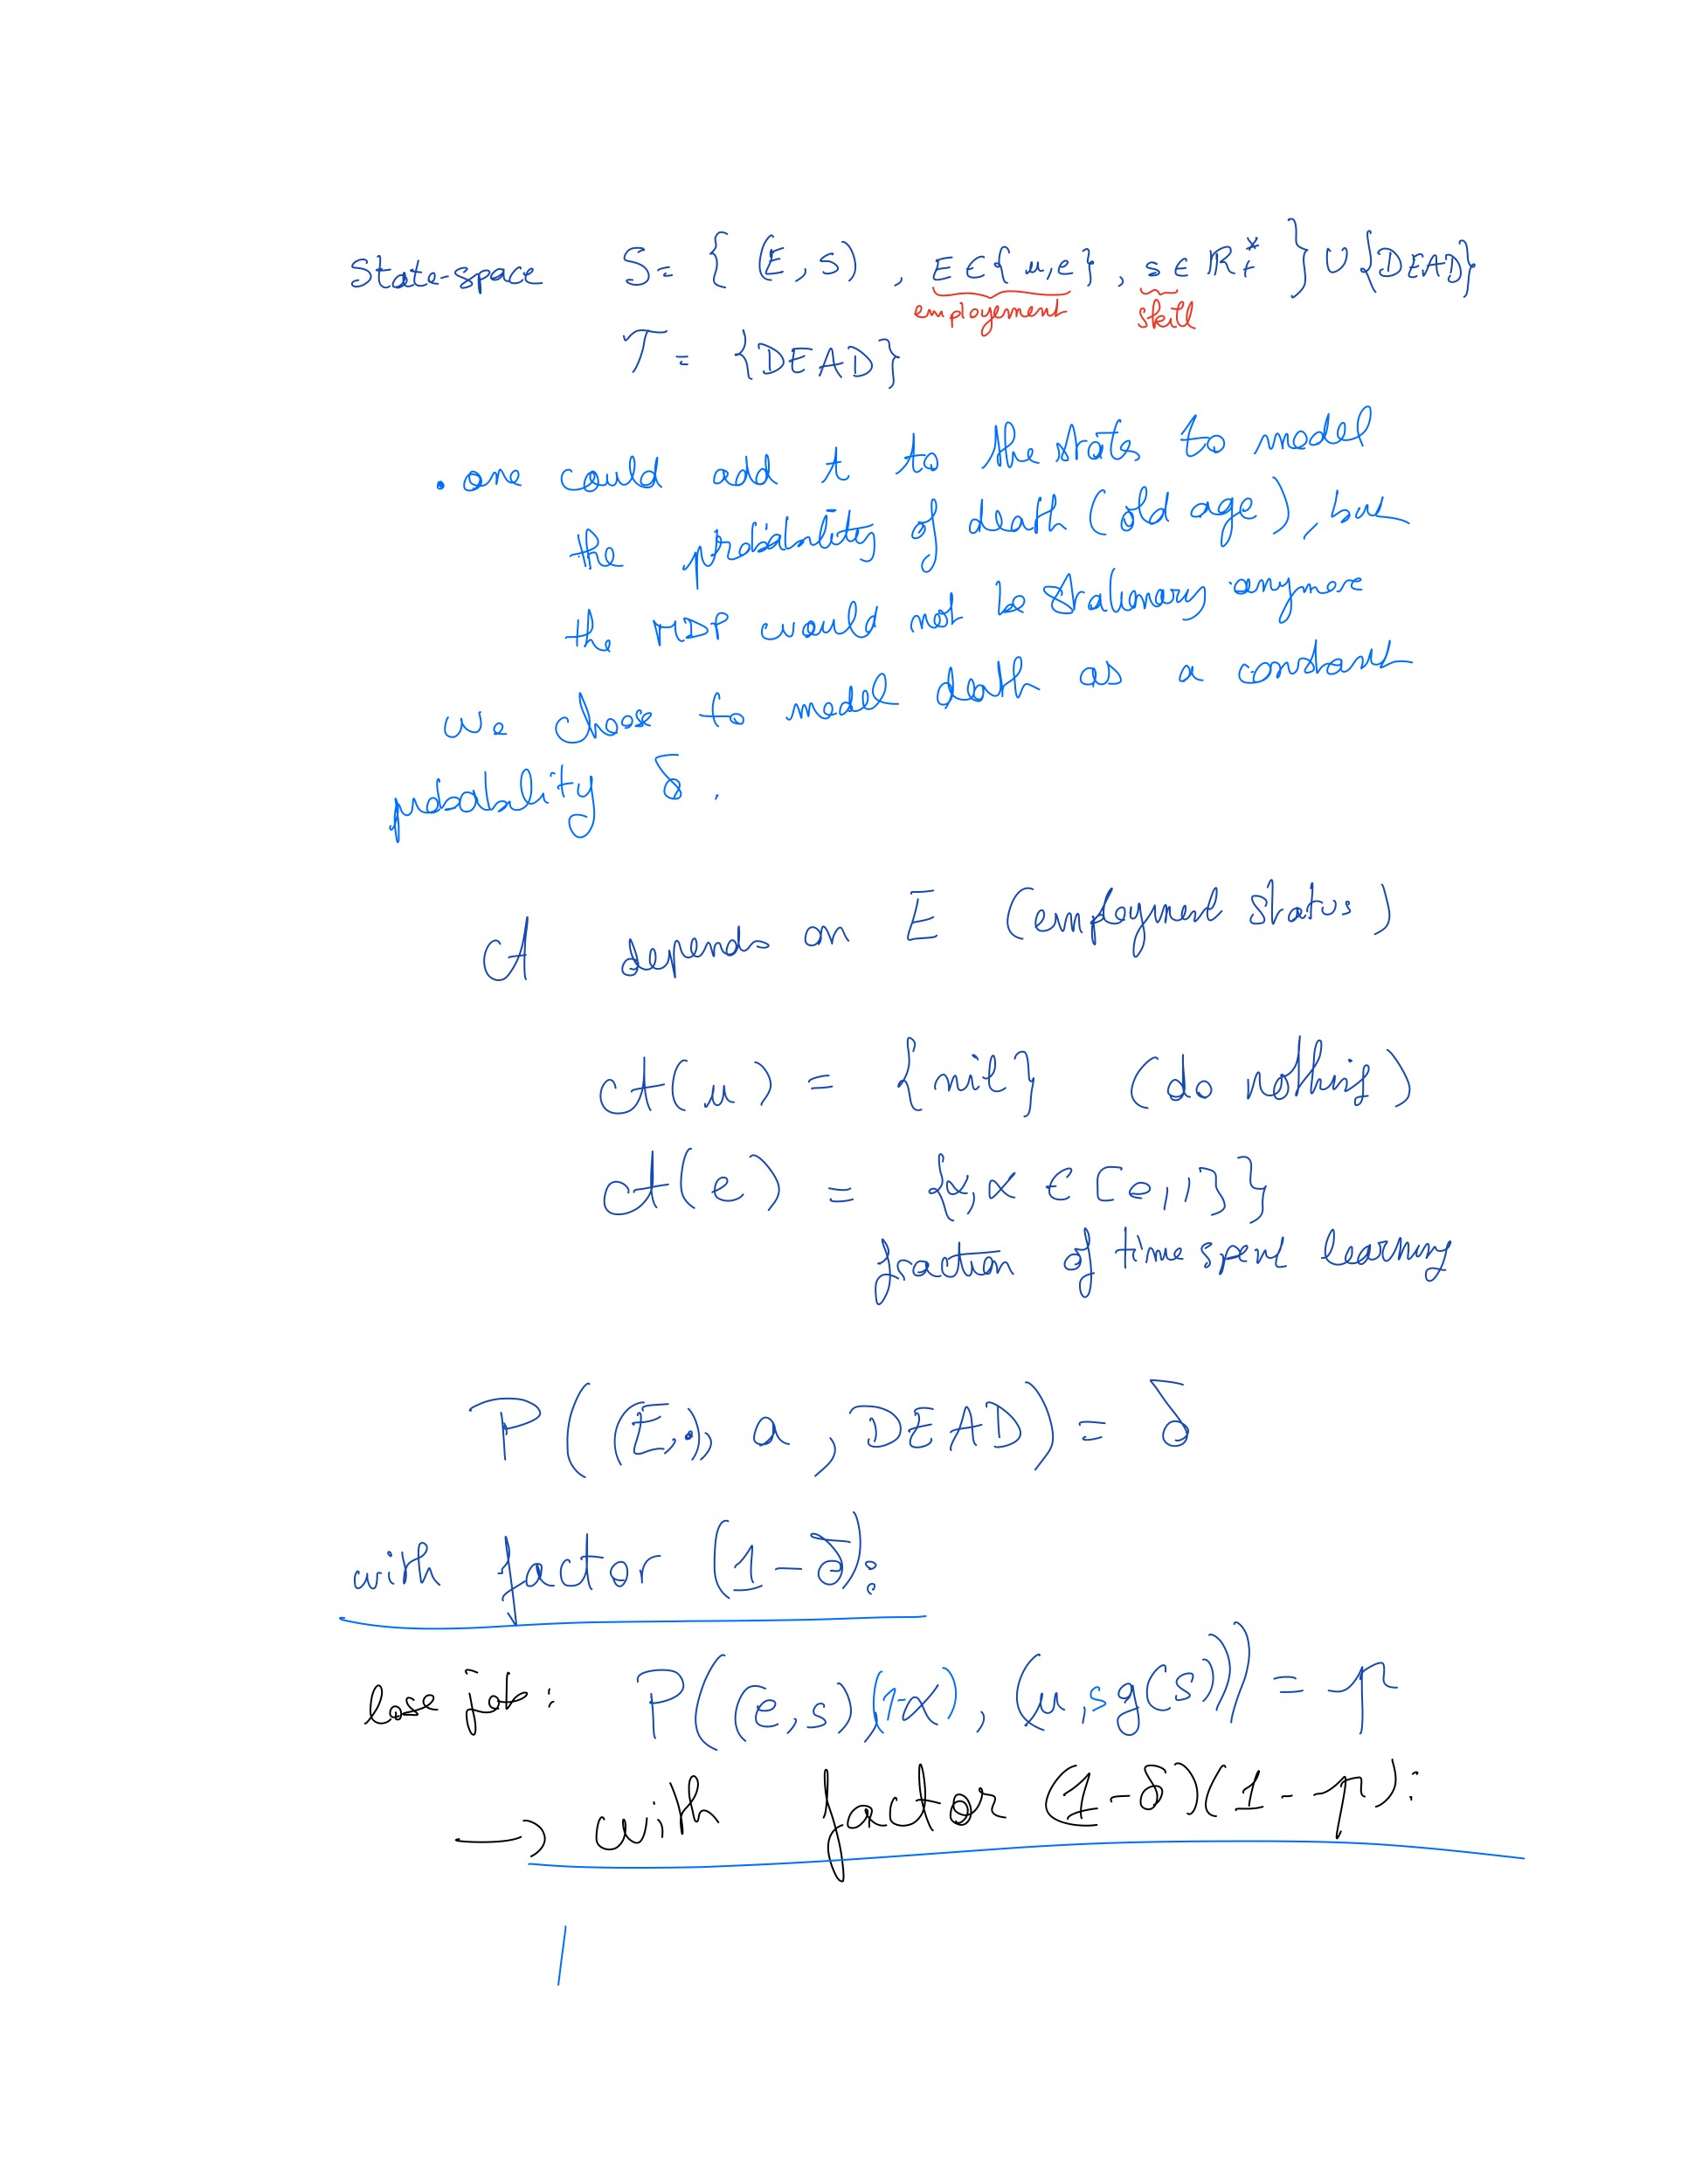

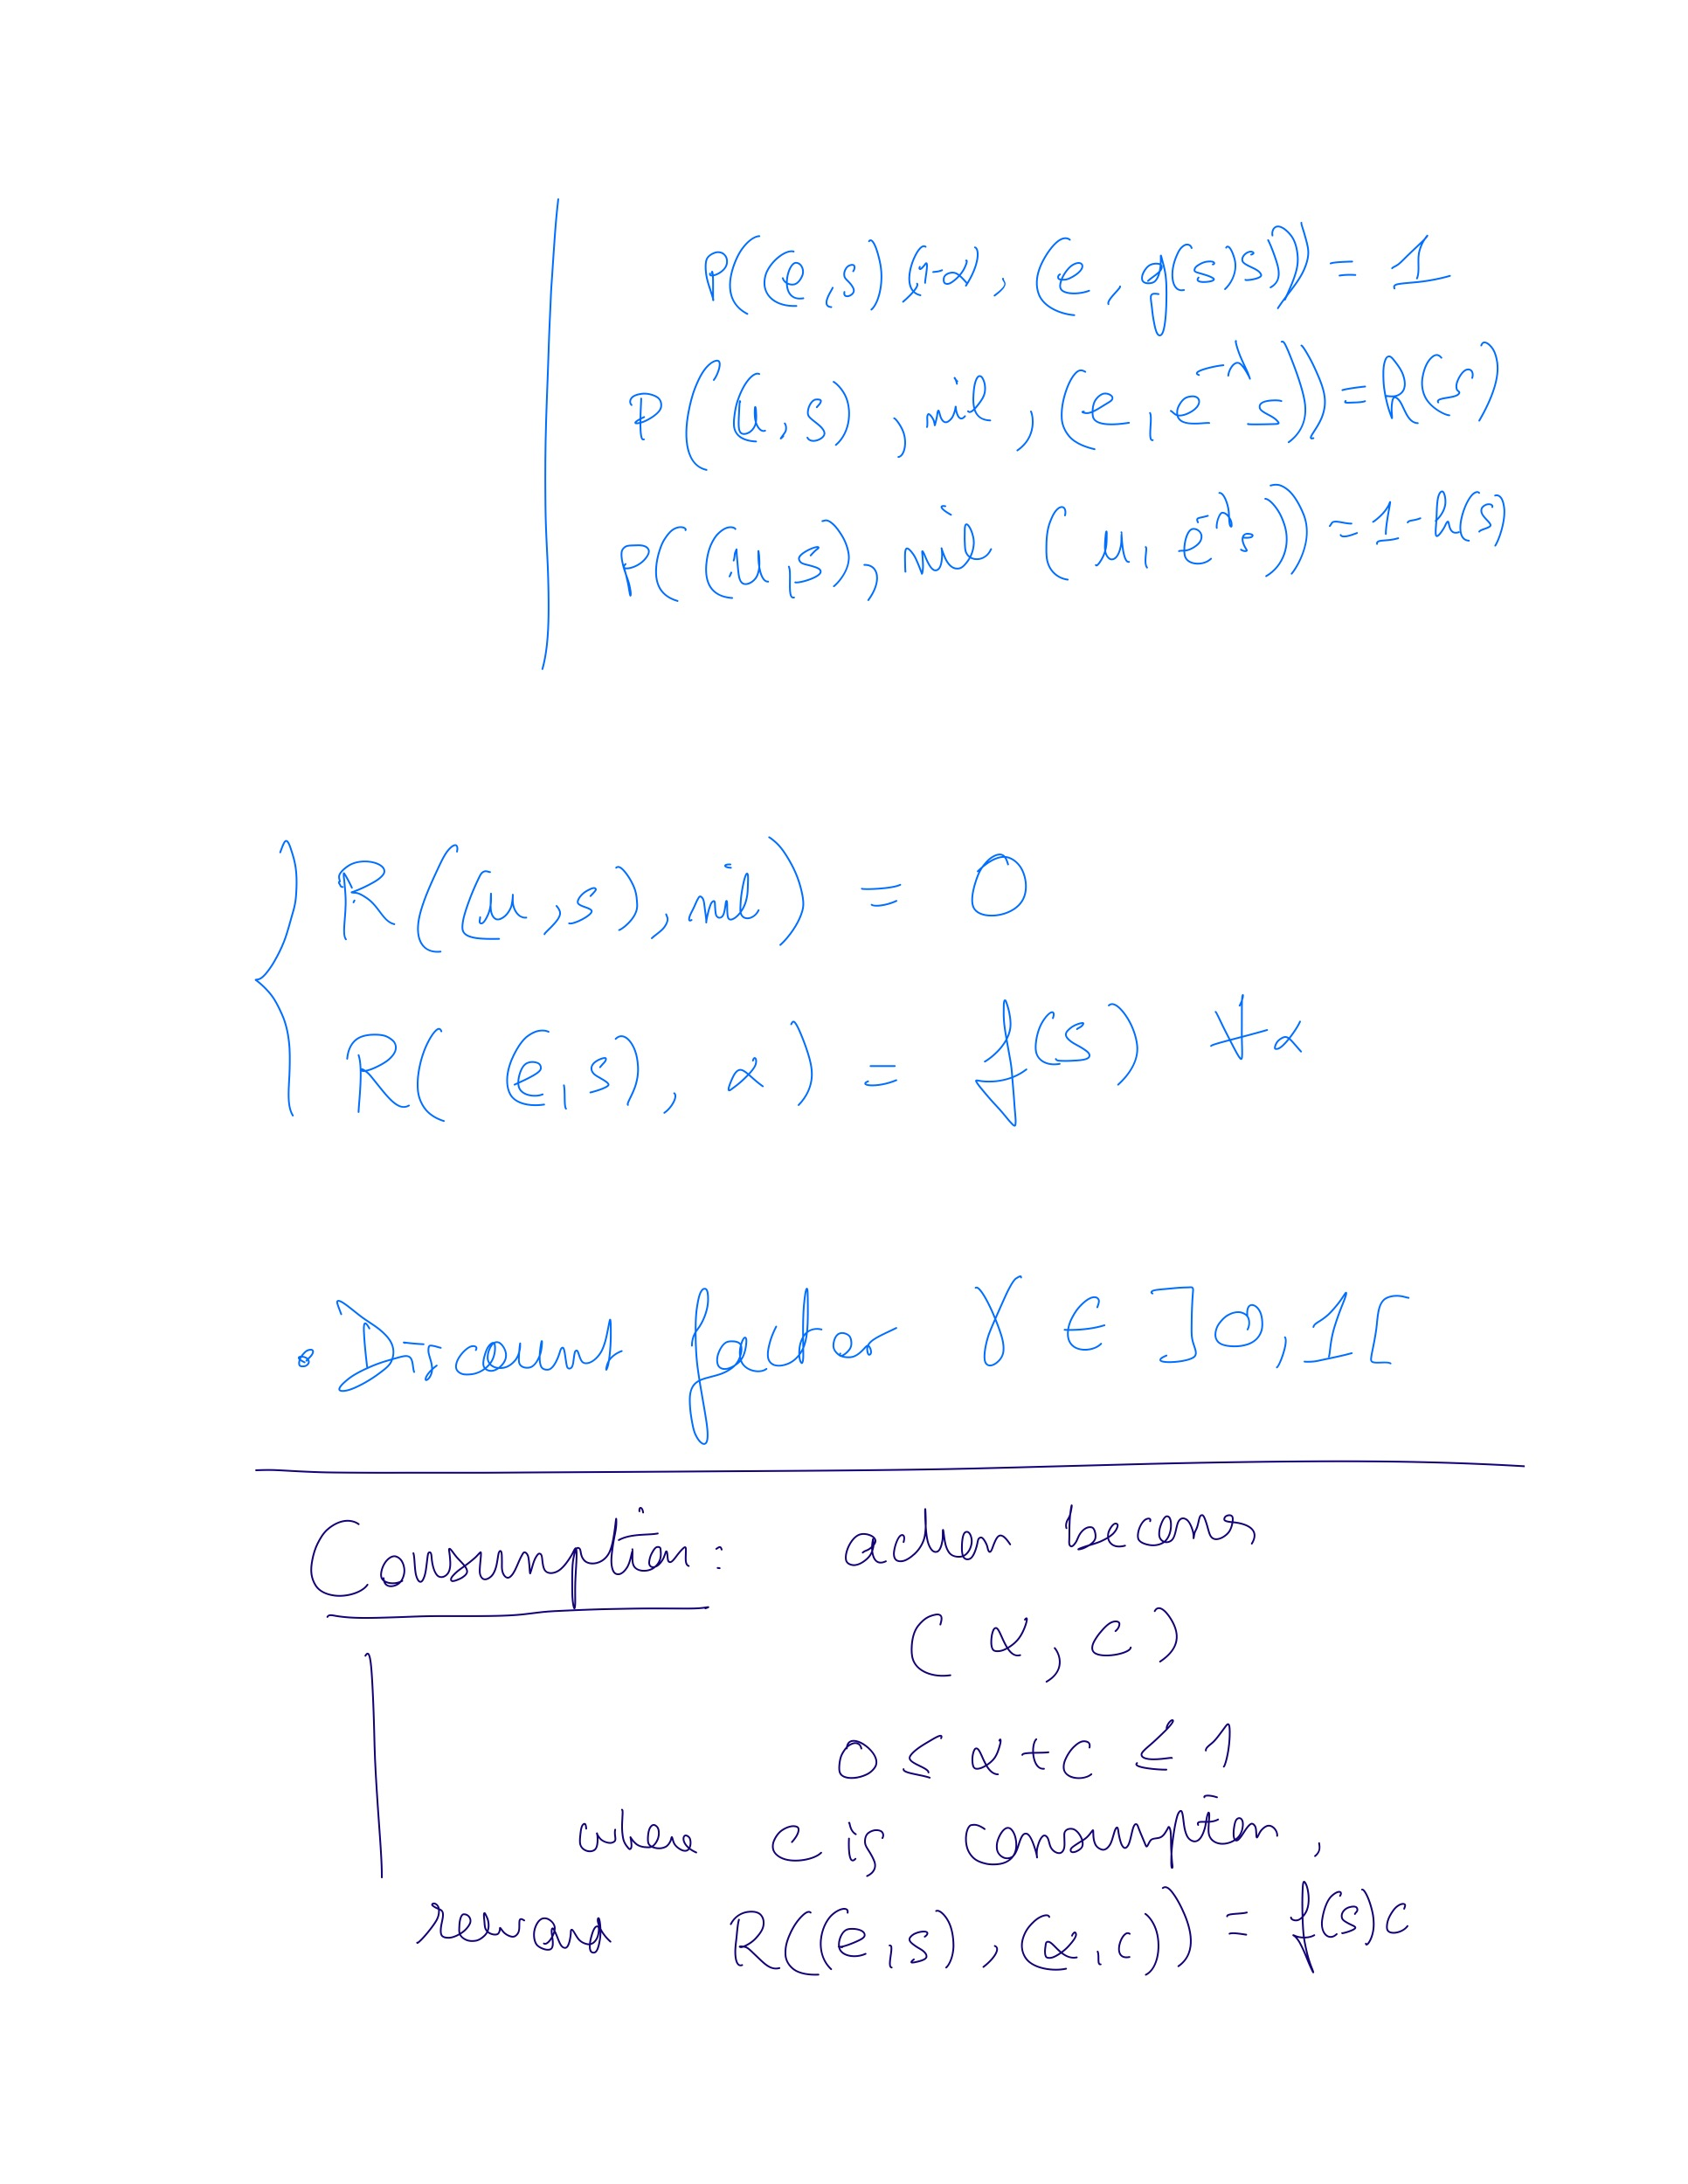

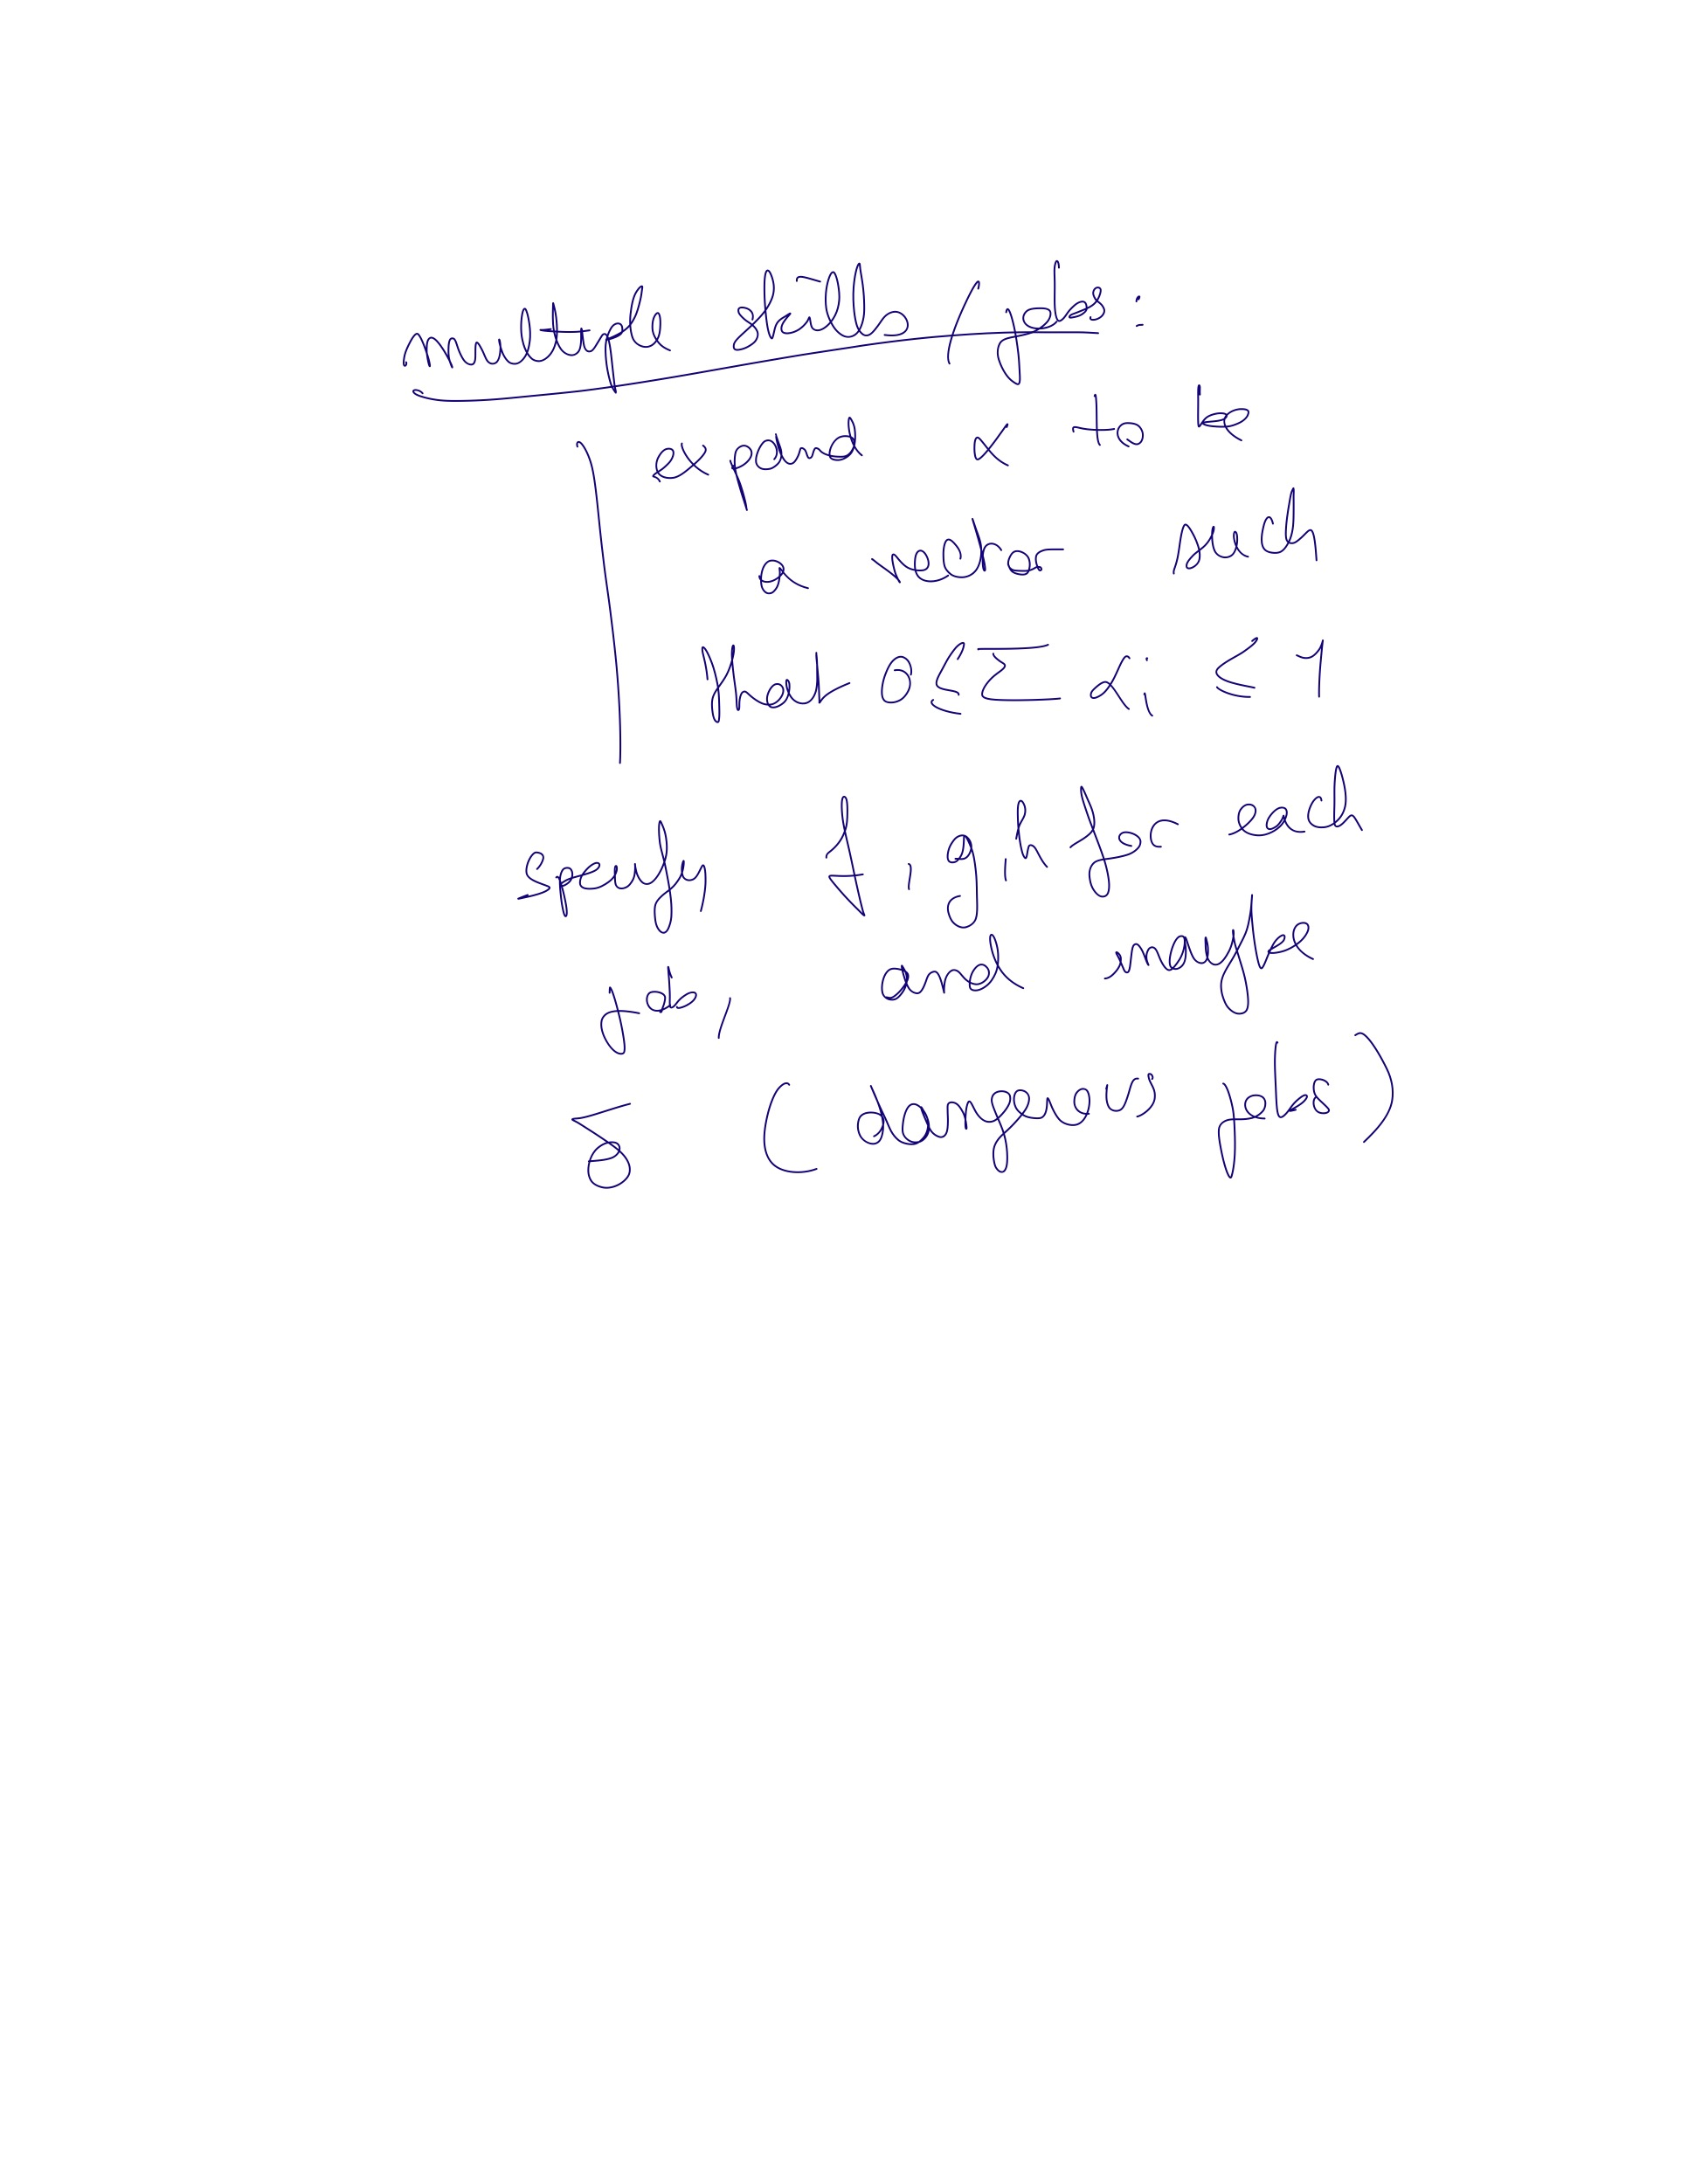